In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
cmap = cmaps.WhiteBlueGreenYellowRed

In [8]:
def draw_thailand(data, vmin=0, vmax=3):
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-90, -70, 5, 25)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(data,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     vmin=vmin, vmax=vmax,
                     cmap='WhiteBlueGreenYellowRed'
                    )
    cbar = fig.colorbar(mat,
                        ax=ax,
                        orientation='horizontal'
                       )
    plt.show()


In [12]:
def load_prediction():
    """
    index0 = 1month prediciton of January based on December 1
    shape = (25years, 12months, 181lats, 360lons)
    """
    loadfile = '/work/kajiyama/preprocessed/ECMWF_forecast/1month_ensemblemean/' \
                'leadtime_1month_ensemblemean_1993_2016.npy'
    data = np.load(loadfile)
    return  data

In [13]:
def extract_thailand(worldmap):
    lt20 = int(89.5 - 19.5)
    ln100 = int(99.5 - 0.5)
    lats = [lt20 -5, lt20 + 15]
    lons = [ln100 - 10, ln100 + 10]
    
    thailand = worldmap[lats[0] : lats[1], lons[0] : lons[1]]
    return thailand

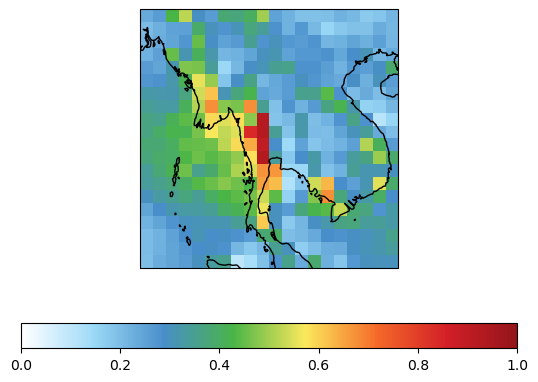

In [16]:
data = load_prediction()
sample = data[0, 8, :, :]
thailand = extract_thailand(sample)
draw_thailand(thailand, vmax=1)